# Conversão de Sinal: Analógico/Digital (A/D) e Digital/Análogico (DA)

## Aproximação do domínio analógico para o digital

Exemplo: Conversão de temperatura

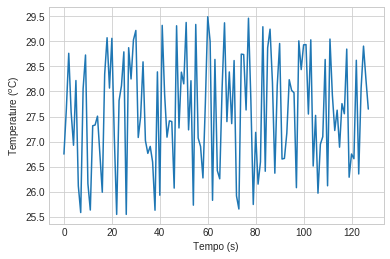

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random
N=128
xs, ys = [], []
for i in range(N):
    xs.append(i)
    ys.append(random.uniform(25.5, 29.5))

plt.xlabel('Tempo (s)')
plt.ylabel('Temperature ($^o$C)')
plt.plot(xs, ys)
plt.show()

Tempo			Medida		Aproximação Digital
0			26.751341		26.8
10			26.159993		26.2
20			29.060516		29.1
30			29.21767		29.2
40			25.930635		25.9
50			28.152836		28.2
60			29.491399		29.5
70			27.359122		27.4
80			27.184222		27.2
90			28.957804		29.0
100			28.930673		28.9
110			26.119049		26.1
120			26.753035		26.8


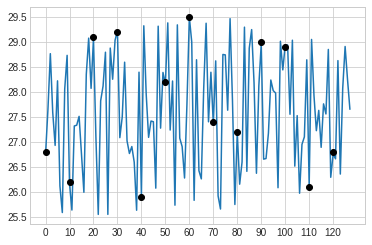

In [47]:
delta_x = 10
plt.plot(xs, ys)
plt.xticks(np.arange(0, N+1, delta_x))
print('Tempo\t\t\tMedida\t\tAproximação Digital')
for i in range(0, N, delta_x):
    x, yA, yD = i, round(ys[i], 6), round(ys[i], 1)
    print('{}\t\t\t{}\t\t{}'.format(x, yA, yD))
    plt.plot(x, yD, 'o', color='black');
plt.show()

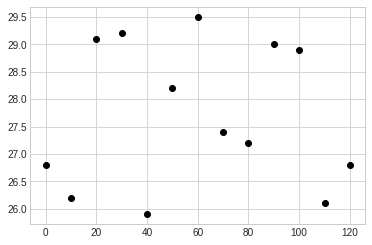

In [48]:
for i in range(0, N, delta_x):
    x, y = i, round(ys[i], 1)
    plt.plot(x, y, 'o', color='black');
plt.show()